# Data Cleaning and Feature Engineering

- Nesta etapa irei fazer a montagem final do dataset para realizar a utilização de algoritmos de Machine Learning, na proxima etapa.
- Apos o scrapping, obtive os dados necessarios por meio das paginas da OLX.
- Vale citar que o data claning é uma das partes mais importantes e que demandam mais tempo no projeto.

In [1]:
import pandas as pd
import numpy as np
import re
import time
import requests as rq
import bs4 as bs4

In [2]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

pd.set_option('max_columns', 28)

In [7]:
df = pd.read_json('parsed_link_info.json',lines = True)
df.tail()

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
13092,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-voyage-trendline-60x1069-sem-entrada-1-6-flex-completo-2018-755236250,vwvolkswagen,38500,passeio,voyage,manual,2018,46000,1.6,flex,hidráulica,branco,sim,voyage trendline 1.6 t.flex 8v 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme"
13093,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_wolksvagen-gol-g6-2015-f-742411522,vwvolkswagen,25550,passeio,gol,manual,2015,100,1.0,flex,hidráulica,branco,0,gol special 1.0 total flex 8v 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som"
13094,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_wosvaguem-gol-751102225,vwvolkswagen,28000,passeio,gol,manual,2015,110,1.6,flex,hidráulica,branco,sim,gol 1.6 msi flex 8v 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré"
13095,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_x-x-volkswagen-gol-trend-line-completo-ano-2018-755668670,vwvolkswagen,34000,hatch,gol,manual,2018,0,1.0,flex,hidráulica,branco,sim,gol trendline 1.0 t.flex 12v 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, sensor de ré"
13096,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_zap-41-ou-com-marcelo-e-jd-carros-100-749960127,gmchevrolet,23990,hatch,celta,manual,2014,75000,1.0,flex,hidráulica,vermelho,sim,celta spirit lt 1.0 mpfi 8v flexp. 5p,4 portas,ipva pago,"vidro elétrico, trava elétrica, ar condicionado, direção hidráulica, alarme, som"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13097 entries, 0 to 13096
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          13097 non-null  object
 1   brand         13097 non-null  object
 2   price         13097 non-null  object
 3   cartype       13097 non-null  object
 4   model         13097 non-null  object
 5   gearbox       13097 non-null  object
 6   regdate       13097 non-null  int64 
 7   mileage       13097 non-null  int64 
 8   motorpower    13097 non-null  object
 9   fuel          13097 non-null  object
 10  car_steering  13097 non-null  object
 11  carcolor      13097 non-null  object
 12  exchange      13097 non-null  object
 13  version       13097 non-null  object
 14  doors         13097 non-null  object
 15  financial     13097 non-null  object
 16  extra         13097 non-null  object
dtypes: int64(2), object(15)
memory usage: 1.7+ MB


In [9]:
df.price

0          52900
1          34900
2          50900
3          29000
4          16500
5          77900
6          25900
7          40000
8          59300
9          19900
10         25900
11         39800
12         42299
13         62000
14         40900
15             0
16         89900
17         37000
18             0
19         39900
20         41900
21         53900
22         32900
23             0
24         49900
25         58900
26             0
27         55000
28         36900
29         49900
30         56000
31         39900
32         35000
33        122900
34         66900
35         36490
36              
37         45990
38              
39              
40             0
41         25500
42         36900
43         40000
44              
45         30000
46             0
47         39900
48         24000
49         30499
50         30499
51         23000
52         49900
53             0
54         23990
55         27000
56         24990
57         27900
58         280

In [6]:
df.head(300)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré"
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som"
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-de-liga-749612640,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré"
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme"
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quente-limp-desemb-758957011,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico
5,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_16-700-km-nova-unico-dono-749763557,gmchevrolet,77900,suv,tracker,automático,2018,16700,1.4,flex,hidráulica,branco,sim,tracker premier 1.4 turbo 16v flex aut,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré"
6,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2-000-48x-699-00-up-take-1-0-super-economico-727044940,vwvolkswagen,25900,hatch,up,manual,2016,32000,1.0,flex,mecnica,0,sim,up take 1.0 t. flex 12v 3p,2 portas,0,0
7,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-chevrolet-cruze-744795347,gmchevrolet,40000,0,cruze,manual,2013,83000,0,flex,hidráulica,branco,não,0,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré"
8,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-chevrolet-s-10-756252316,gmchevrolet,59300,0,s10,manual,2013,100000,0,flex,hidráulica,preto,não,0,4 portas,ipva pago,0
9,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-ford-ka-753704987,ford,19900,hatch,ka,manual,2013,89000,1.0,flex,mecnica,preto,sim,ka 1.0 8v 1.0 8v st flex 3p,2 portas,ipva pago,"vidro elétrico, trava elétrica, som"


In [10]:
df.loc[df.price == '',:].tail()

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
12723,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-gol-g6-trend-60x599-sem-entrada-4-portas-2013-747839202,vwvolkswagen,,passeio,gol,manual,2013,119000,1.0,flex,hidráulica,vermelho,sim,gol novo 1.0 mi total flex 8v 4p,4 portas,ipva pago,"vidro elétrico, trava elétrica, direção hidráulica, alarme, som"
12845,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-saveiro-em-otimo-estado-746977312,vwvolkswagen,,0,saveiro,manual,2014,70,0,flex,0,0,0,0,0,0,0
12869,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-t-cross-comfortline-1-0-tsi-flex-5p-aut-757431803,vwvolkswagen,,passeio,tcross,automático,2020,3750,1.0,flex,elétrica,branco,sim,t cross comfortline 1.0 tsi flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, alarme, som, c mera de ré"
12892,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-up-move-60x849-sem-entrada-1-0-flex-4p-completo-2015-750405832,vwvolkswagen,,passeio,up,manual,2015,99000,1.0,flex,hidráulica,prata,sim,up move 1.0 total flex 12v 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som"
12953,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_vw-volkswagen-gol-1-0-city-flex-manual-ipva-2020-pago-2015-740630275,vwvolkswagen,,0,gol,manual,2015,0,1.0,flex,hidráulica,cinza,não,gol novo 1.0 mi total flex 8v 4p,2 portas,0,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré"


**Analise de Dados Exploratória**

- É possivel visualizar por meio do comando anterior algumas células vazias. Porém após uma pequena análise foi possível extrair que os carros que não possuem preço estariam no site para troca, o que não entra no escopo do negócio proposto no projeto. Pois quem colocaria um carro para vender sem o preço no site?Portanto cheguei a conclusão que o camimho a ser tomado deveria ser a exclusão dessas anúncios na base de dados.

In [11]:
#Todas as linhas com espaços vazios

empty_price = np.where(df.applymap(lambda x: x == ''))[0]
empty_price

#Portando são 166 linhas vazias

array([   36,    38,    39,    44,   101,   106,   110,   206,   223,
         266,   291,   635,   698,  1228,  1229,  1473,  1609,  1720,
        1898,  1994,  2005,  2011,  2015,  2023,  2024,  2057,  2184,
        2282,  2638,  2688,  2690,  2730,  2838,  2840,  3047,  3135,
        3195,  3275,  3364,  3366,  3466,  3644,  3736,  3880,  3892,
        3975,  4083,  4613,  4731,  4771,  5001,  5021,  5446,  5449,
        5497,  5948,  6062,  6080,  6121,  6181,  6305,  6402,  6412,
        6725,  6854,  6967,  7008,  7047,  7247,  7270,  7271,  7278,
        7309,  7327,  7371,  7377,  7427,  7469,  7472,  7499,  7555,
        7622,  7761,  7830,  7894,  7897,  8009,  8015,  8021,  8022,
        8026,  8041,  8088,  8159,  8340,  8360,  8500,  8503,  8519,
        8547,  8557,  8580,  8669,  8677,  9075,  9078,  9146,  9212,
        9336,  9341,  9386,  9425,  9435,  9482,  9560,  9658,  9697,
        9705,  9739,  9740,  9742,  9743,  9744,  9745, 10094, 10116,
       10117, 10144,

In [12]:
#drop as linhas da variavel empty_price

df.drop(index = empty_price, inplace = True)

#reseta o index - com os novos index após a retiras das linhas vazias

df = df.reset_index(drop=True)
df.head(5)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré"
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som"
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-de-liga-749612640,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré"
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme"
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quente-limp-desemb-758957011,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico


In [10]:
df.price

0          52900
1          34900
2          50900
3          29000
4          16500
5          77900
6          25900
7          40000
8          59300
9          19900
10         25900
11         39800
12         42299
13         62000
14         40900
15             0
16         89900
17         37000
18             0
19         39900
20         41900
21         53900
22         32900
23             0
24         49900
25         58900
26             0
27         55000
28         36900
29         49900
30         56000
31         39900
32         35000
33        122900
34         66900
35         36490
36         45990
37             0
38         25500
39         36900
40         40000
41         30000
42             0
43         39900
44         24000
45         30499
46         30499
47         23000
48         49900
49             0
50         23990
51         27000
52         24990
53         27900
54         28000
55         28100
56         29900
57         26990
58         309

In [13]:
#Conferindo

empty_price1 = np.where(df.applymap(lambda x: x == ''))[0]
empty_price1

array([], dtype=int64)

In [10]:
#Conferindo novamente

df.iloc[[36]]

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
36,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_29000km-crossfox-760242612,vwvolkswagen,45990,suv,crossfox,manual,2016,29000,1.6,flex,hidráulica,branco,sim,crossfox 1.6 t. flex 16v 5p,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som"


In [14]:
df.iloc[[10261]]

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
10261,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_up-speed-tsi-2017-758626054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Após feita a checagem do dataframe anteriormente, iremos analisar agora se existe a presença de valores Nan.
- Portanto mesmo indicando que não ocorrem valores nan, ainda deve ser feita a analise exploratória para valores que contem zero, pois o mesmo é indicado como um número pelo análise feita abaixo.

In [15]:
df.isna().sum()

link            0
brand           0
price           0
cartype         0
model           0
gearbox         0
regdate         0
mileage         0
motorpower      0
fuel            0
car_steering    0
carcolor        0
exchange        0
version         0
doors           0
financial       0
extra           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12933 entries, 0 to 12932
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          12933 non-null  object
 1   brand         12933 non-null  object
 2   price         12933 non-null  object
 3   cartype       12933 non-null  object
 4   model         12933 non-null  object
 5   gearbox       12933 non-null  object
 6   regdate       12933 non-null  int64 
 7   mileage       12933 non-null  int64 
 8   motorpower    12933 non-null  object
 9   fuel          12933 non-null  object
 10  car_steering  12933 non-null  object
 11  carcolor      12933 non-null  object
 12  exchange      12933 non-null  object
 13  version       12933 non-null  object
 14  doors         12933 non-null  object
 15  financial     12933 non-null  object
 16  extra         12933 non-null  object
dtypes: int64(2), object(15)
memory usage: 1.7+ MB


- Variáveis como price devem ser do tipo int para a utilização no modelo, portanto será feita a atualização pra a mesma.
- Já variável como motorpower, possui número, mas para o modelo o melhor é mantela como objeto.
- regadte e mileage serão mantida como int, porem regdate possui sempre quatro numeros não sendo necessário mantela como int64 e sim int, para diminuir o uso da memória.

In [17]:
df.astype({'price': 'int64',
          'regdate': 'int'}).dtypes


link            object
brand           object
price            int64
cartype         object
model           object
gearbox         object
regdate          int32
mileage          int64
motorpower      object
fuel            object
car_steering    object
carcolor        object
exchange        object
version         object
doors           object
financial       object
extra           object
dtype: object

- Deletarei as linhas onde o preço, modelo e a kilometragem são igual a zero.
- Estas são informações necessárias para o desenvolvimento do modelo, carros que não possuem as mesmas podem enviesar a performance do modelo.

In [18]:
zero_price = df.loc[df.price == 0, : ].index
zero_price

Int64Index([   15,    18,    23,    26,    37,    42,    49,    60,    80,
               85,
            ...
            12775, 12787, 12794, 12822, 12831, 12848, 12859, 12873, 12892,
            12897],
           dtype='int64', length=919)

In [19]:
def del_rows(df, features):
    '''Deleta as linhas onde a variável especificada é zero
    
    ARG:
    df(dataframe): O dataframe que irá ser processado
    features: As variáveis que podem possuir zeros e devem ser retiradas do data frame
    
    RETURNS:
    df_drop(dataframe): O dataframe com as variáveis especificadas deletadas.'''
    
    df_drop = df.copy()
    
    for feature in features:
        #Linhas onde as variáveis são igual a zero, indicando o index
        zeros_index = df_drop.loc[df_drop[feature] == 0, : ].index
        #dropando as linhas
        df_drop = df_drop.drop(zeros_index, axis = 0)#axis = 0 > ao longo da linha

    df_drop = df_drop.reset_index(drop=True)
    
    return df_drop

In [20]:
colnames = ['price', 'model', 'mileage']

df = del_rows(df, colnames)

In [21]:
# verificando

df.loc[df.price == 0, :].index

Int64Index([], dtype='int64')

In [22]:
df.iloc[[15]]

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra
15,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2014-volkswagen-golf-gti-2-0-tsi-faco-trocas-745084492,vwvolkswagen,89900,hatch,golf,automático,2015,76000,2.02.9,flex,hidráulica,cinza,não,golf gti 2.0 tsi 220cv aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré"


### Rotulagem dos Dados - Target

- Os dados foram obtidos por meio de web-scraping, portanto os mesmo não apresentavam a variável alvo (Y) até o momento. Está variável deve seguir as características que seriam importante para a compra do carro em minha opiniâo, sendo indicados como 0 se o carro não possui preferência de compra e 1 caso o carro possua preferência.
- No caso poderia ser realizada essa rotulagem de algumas formas, como a Active Learning na qual por meio de algorítmos de machine learning, rotulamos uma fração dos dados de o algoritmo permite a sua generalização para o restante dos dados. Existem varios algorítmos que podem fazer esse processo. Outro modo poderia ser fazer a rotulagem manualmente, porém demandaria um grande esforço e tempo para a realização desta tarefa.
- Sendo assim, tracei uma abordagem diferente no qual selecionei algumas variáveis no qual são imprecendiveis para a escolha do carro em minha opiniao, que seria a caixa de cambio automática, ou preço abaixo de 60.000,00 reais e o ano de fabricação acima de 2013. Tendo essas informações utilizei métodos booleanos e classifiquei os carros. Este dataset na vdd servirá como proxy para o desenvolvimento de todo o projeto e ao seu final, vendo que o deploy está ok, irei realizar uma melhor rotulagem dos dados para diminuir a correlação e o viés já apresentado.

In [22]:
df.price

0          52900
1          34900
2          50900
3          29000
4          16500
5          77900
6          25900
7          40000
8          59300
9          19900
10         25900
11         39800
12         42299
13         62000
14         40900
15         89900
16         37000
17         39900
18         41900
19         53900
20         32900
21         49900
22         58900
23         55000
24         36900
25         49900
26         56000
27         39900
28         35000
29        122900
30         66900
31         36490
32         45990
33         25500
34         36900
35         40000
36         30000
37         39900
38         24000
39         30499
40         23000
41         49900
42         23990
43         27000
44         24990
45         27900
46         28000
47         28100
48         29900
49         26990
50         30900
51         27000
52         25800
53         26700
54         27300
55         27000
56         31800
57         26900
58         260

In [23]:
#tranforma o preço em int, para a classificação.

df['price'] = df['price'].astype(int)

In [67]:
df.regdate.value_counts()

2013    2194
2014    2106
2015    1691
2019    1600
2018    1467
2017    1209
2016    1061
2020     258
2010       2
2006       1
2005       1
2012       1
2011       1
2009       1
Name: regdate, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11593 entries, 0 to 11592
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          11593 non-null  object
 1   brand         11593 non-null  object
 2   price         11593 non-null  int32 
 3   cartype       11593 non-null  object
 4   model         11593 non-null  object
 5   gearbox       11593 non-null  object
 6   regdate       11593 non-null  int64 
 7   mileage       11593 non-null  int64 
 8   motorpower    11593 non-null  object
 9   fuel          11593 non-null  object
 10  car_steering  11593 non-null  object
 11  carcolor      11593 non-null  object
 12  exchange      11593 non-null  object
 13  version       11593 non-null  object
 14  doors         11593 non-null  object
 15  financial     11593 non-null  object
 16  extra         11593 non-null  object
dtypes: int32(1), int64(2), object(14)
memory usage: 1.5+ MB


In [55]:
df['Y'] = (df['gearbox'] == 'automático')
df['Y']

0         True
1        False
2        False
3        False
4        False
5         True
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14        True
15        True
16       False
17       False
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29        True
30        True
31       False
32       False
33       False
34       False
35       False
36       False
37        True
38       False
39       False
40       False
41        True
42       False
43        True
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51        True
52        True
53       False
54       False
55       False
56        True
57       False
58        True
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [51]:
#classificando por meio do AND, as três principais caracteristica para a escolha do carro, não contando com os itens opicionais.

df['Y'] = ( df['gearbox'] == 'automático') & (df['price'] < 60000 ) & ( df['regdate'] > 2013)
df['Y']

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14        True
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37        True
38       False
39       False
40       False
41        True
42       False
43        True
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51        True
52       False
53       False
54       False
55       False
56        True
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [52]:
#contando cada classe

df.Y.value_counts()

False    9893
True     1700
Name: Y, dtype: int64

In [54]:
#Tranformando os bool em 0 e 1.

df['Y'] = df['Y'].astype(int)

In [55]:
df.head(50)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",1
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som",0
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-de-liga-749612640,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",0
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme",0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quente-limp-desemb-758957011,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico,0
5,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_16-700-km-nova-unico-dono-749763557,gmchevrolet,77900,suv,tracker,automático,2018,16700,1.4,flex,hidráulica,branco,sim,tracker premier 1.4 turbo 16v flex aut,4 portas,0,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré",0
6,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2-000-48x-699-00-up-take-1-0-super-economico-727044940,vwvolkswagen,25900,hatch,up,manual,2016,32000,1.0,flex,mecnica,0,sim,up take 1.0 t. flex 12v 3p,2 portas,0,0,0
7,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-chevrolet-cruze-744795347,gmchevrolet,40000,0,cruze,manual,2013,83000,0,flex,hidráulica,branco,não,0,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, c mera de ré",0
8,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-chevrolet-s-10-756252316,gmchevrolet,59300,0,s10,manual,2013,100000,0,flex,hidráulica,preto,não,0,4 portas,ipva pago,0,0
9,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_2013-ford-ka-753704987,ford,19900,hatch,ka,manual,2013,89000,1.0,flex,mecnica,preto,sim,ka 1.0 8v 1.0 8v st flex 3p,2 portas,ipva pago,"vidro elétrico, trava elétrica, som",0


In [56]:
df.to_csv('car_information_target.csv')

In [4]:
df = pd.read_csv('car_information_target.csv', index_col = 0)

### Engenharia dos Dados

- Por meio das fases anteriores, foi possível fazer pré-processamento dos dados e retirar os dados que não seriam uteis ou poderiam enviesar o modelo.
- A partir desta fase iremos fazer a data engineering dos dados para obter o melhor shape para o desenvolvimento do modelo de Machine Learning na fase posterior.

**Criando uma coluna para cada opcional (extra)**

- Para identificar todas as informações extras que tenho, vou verificar o comprimento da coluna extra, identificar o comprimento da cadeia de caracteres e ver cada recurso extra que ela contém. Dessa forma, eu posso criar colunas específicas para cada um desses recursos.

In [70]:
#adiciona uma coluna com  o tamanho da coluna 'extra'
df['extra_len']= [len(x) if type(x) == str else x for x in df.extra]
df.head(5)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y,extra_len
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",1,103.0
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som",0,89.0
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-de-liga-749612640,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",0,103.0
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme",0,48.0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quente-limp-desemb-758957011,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico,0,14.0


In [74]:
#o número max de letras

df['extra_len'].max()

127.0

In [75]:
#Indicando os carros que possuem o maior número de equipamentos, para ser a base.

pd.set_option('max_colwidth', 128) #indicando que o tamanho maximo da coluna sera de 128 caracteres.

greater_lengh = df['extra_len'].max()
df.loc[df.extra_len == greater_lengh, :].extra.head()

23      vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré
168     vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré
1287    vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré
2294    vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré
2342    vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré
Name: extra, dtype: object

- Olhando as linha acima pode-se ver todas os equipamentos que podem ser convertidos em colunas, esta será a base utilizada, para a categorização dos itens.

In [79]:
features = df.loc[df.extra_len == greater_lengh, :].extra.values
features[0]

'vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré, blindado, c mera de ré'

In [80]:
#indicar o número máximo de equipamentos.

len(features[0].rsplit(','))

10

In [81]:
#Retirando uma feature unica.

features[0].rsplit(',')[3].strip()

'ar condicionado'

In [82]:
#Criando uma coluna para cada equipamento da coluna extra. .astype(int)

for feature in range(10):
    colname = features[0].rsplit(',')[feature].strip()
    df[colname] = 0.0

In [89]:
#As colunas possuem apenas o valor zero.

df.head()

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y,vidro elétrico,air bag,trava elétrica,ar condicionado,direção hidráulica,alarme,som,sensor de ré,blindado,c mera de ré
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-...,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quent...,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#excluindo a coluna extra_len

df.drop('extra_len', axis = 1, inplace = True)
df.columns

Index(['link', 'brand', 'price', 'cartype', 'model', 'gearbox', 'regdate',
       'mileage', 'motorpower', 'fuel', 'car_steering', 'carcolor', 'exchange',
       'version', 'doors', 'financial', 'extra', 'Y', 'vidro elétrico',
       'air bag', 'trava elétrica', 'ar condicionado', 'direção hidráulica',
       'alarme', 'som', 'sensor de ré', 'blindado', 'c mera de ré'],
      dtype='object')

- Configurando os valores nas novas colunas criadas para os opcionais, portanto indicando 0 caso não ocorra e 1 caso ocorra o equipamento.
- Por meio da info,a chamos a coluna extra com o index 16.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11593 entries, 0 to 11592
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   link                11593 non-null  object 
 1   brand               11593 non-null  object 
 2   price               11593 non-null  int32  
 3   cartype             11593 non-null  object 
 4   model               11593 non-null  object 
 5   gearbox             11593 non-null  object 
 6   regdate             11593 non-null  int64  
 7   mileage             11593 non-null  int64  
 8   motorpower          11593 non-null  object 
 9   fuel                11593 non-null  object 
 10  car_steering        11593 non-null  object 
 11  carcolor            11593 non-null  object 
 12  exchange            11593 non-null  object 
 13  version             11593 non-null  object 
 14  doors               11593 non-null  object 
 15  financial           11593 non-null  object 
 16  extr

In [86]:
#Pegando as colunas com os opcionais.

df.columns[(18):]

Index(['vidro elétrico', 'air bag', 'trava elétrica', 'ar condicionado',
       'direção hidráulica', 'alarme', 'som', 'sensor de ré', 'blindado',
       'c mera de ré'],
      dtype='object')

In [87]:
df.shape[0]

11593

In [90]:
def fill_in_features(df):
    '''Preenche as células da variável informando se o carro contém o respectivo equipamento.
    
    ARG: df(dataframe): O dataframe que será preenchido
    
    RETURNS: df(dataframe): Retorna o dataframe com  as colunas que contém os equipamentos preenchidas.
    '''
    
    for feature in df.columns[18:]: #Indica as colunas que devem ser preenchidas
        
        total_rows = df.shape[0] #número maximo de linhas a serem iteradas
        
        for row in range(total_rows): #iteração das linhas
            
            is_zero = (df.extra[row] == 0) #se a coluna extra paras o item é 0, continuar 0
            
            if is_zero == True:
                
                df[feature].values[row] = 0.0
                
            else:
                
                contains_feature = feature in df.extra[row] 
                
                if contains_feature == True:
                    df[feature].values[row] = 1
                else: 
                    continue
                    
    return df

In [91]:
df = fill_in_features(df)
df.head()

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y,vidro elétrico,air bag,trava elétrica,ar condicionado,direção hidráulica,alarme,som,sensor de ré,blindado,c mera de ré
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som",0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-...,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,ford,29000,0,focus,manual,2013,100000,0,flex,hidráulica,preto,0,focus 1.8 16v 5p,0,financiado,"air bag, trava elétrica, ar condicionado, alarme",0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quent...,gmchevrolet,16500,passeio,celta,manual,2013,106859,1.0,flex,mecnica,preto,0,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,ipva pago,vidro elétrico,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#Deletando a coluna extra.

df.drop('extra', axis = 1, inplace = True)

In [93]:
#Tirando os espaços dos nomes das colunas.

df.rename(columns = {'air bag': 'air_bag',
                    'trava elétrica':'trava_elétrica',
                    'ar condicionado':'ar_condicionado',
                    'direção hidráulica': 'direção_hidráulica',
                    'sensor de ré':'sensor_de_ré',
                    'c mera de ré': 'camera_de_ré',
                    'vidro elétrico':'vidro_elétrico'}, inplace = True)
df.head(3)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,Y,vidro_elétrico,air_bag,trava_elétrica,ar_condicionado,direção_hidráulica,alarme,som,sensor_de_ré,blindado,camera_de_ré
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,gmchevrolet,52900,passeio,spin,automático,2016,78000,1.8,flex,hidráulica,branco,sim,spin activ 1.8 8v econo. flex 5p aut.,4 portas,ipva pago,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,ford,34900,passeio,ka,manual,2015,89000,1.0,flex,elétrica,branco,sim,ka sedan 1.0 sel ticvt flex 4p,4 portas,ipva pago,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-...,gmchevrolet,50900,sedã,prisma,manual,2019,31709,1.4,flex,elétrica,branco,sim,prisma sed. lt 1.4 8v flexpower 4p,4 portas,ipva pago,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


### Variáveis Dummies

- Agora irei analisar as opções que foram apresentadas em cada variável categórica, para assim desenvolver as variáveis dummies a serem utilizadas, para cada característica.

In [94]:
#marca do carro (brand)

df.brand.value_counts()

gmchevrolet     4401
vwvolkswagen    4381
ford            2799
renault            3
fiat               3
mitsubishi         2
peugeot            1
honda              1
nissan             1
jeep               1
Name: brand, dtype: int64

- É visto que foram coletadas no site da OLX, as três marcas escolhidas antes do scrapping, gm, vw e ford e algumas outras que não estavam na escolha inicial. Deve se analiser dependendo do projeto se devemos mante-las ou retira-las.

In [95]:
#Cartype

df.cartype.value_counts()

hatch            3889
sedã             2369
0.0              2028
passeio          1835
pickup            616
suv               583
vanutilitário     271
buggy               1
antigo              1
Name: cartype, dtype: int64

In [96]:
#Model

df.model.value_counts()

gol             1207
onix            1194
ka               871
cruze            845
fiesta           763
voyage           717
prisma           602
fox              586
focus            569
saveiro          564
ecosport         426
spin             347
cobalt           321
up               305
montana          256
polo             253
celta            224
tracker          199
jetta            168
s10              148
spacefox         115
golf             115
virtus           114
classic          104
fusion            91
crossfox          89
ranger            73
agile             73
sonic             54
kombi             48
tcross            39
corsa             22
tiguan            21
spacecross        18
parati             8
passat             6
equinox            6
joy                4
fusca              3
variant            3
escort             2
edge               2
sandero            2
pajero             1
fit                1
chevette           1
uno                1
courier      

In [97]:
#gearbox

df.gearbox.value_counts()

manual            8273
automático        3230
semiautomático      45
0.0                 45
Name: gearbox, dtype: int64

In [98]:
#motorpower

df.motorpower.value_counts()

1.0          3593
1.6          2653
0.0          1825
1.4          1513
1.8           848
2.02.9        808
1.5           333
4.0oumais       6
3.03.9          5
1.7             4
1.9             3
1.2             2
Name: motorpower, dtype: int64

In [99]:
#Fuel

df.fuel.value_counts()

flex        11590
diesel          2
gasolina        1
Name: fuel, dtype: int64

In [100]:
#car_steering

df.car_steering.value_counts()

hidráulica    7206
elétrica      2802
0.0           1019
mecnica        540
assistida       26
Name: car_steering, dtype: int64

In [101]:
#Cor

df.carcolor.value_counts()

branco      4749
prata       2401
preto       1702
0.0          997
vermelho     721
cinza        698
azul         153
outra        121
laranja       26
amarelo       14
verde         11
Name: carcolor, dtype: int64

In [79]:
#exchange

df.exchange.value_counts()

sim    5762
0.0    3493
não    2338
Name: exchange, dtype: int64

In [81]:
#financial

df.financial.value_counts()

ipva pago     5822
0.0           5287
financiado     393
de leilão       81
com multas      10
Name: financial, dtype: int64

- Criando as dummies para as opções elencadas.

In [102]:
to_dummies = ['financial', 'brand', 'cartype', 'model','gearbox', 'motorpower', 'fuel', 'car_steering','carcolor',
             'exchange']

df = pd.get_dummies(df, columns = to_dummies, drop_first = True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11593 entries, 0 to 11592
Columns: 128 entries, link to exchange_sim
dtypes: float64(10), int32(2), int64(2), object(3), uint8(111)
memory usage: 2.6+ MB


In [103]:
df.head()

,link,price,regdate,mileage,version,doors,Y,vidro_elétrico,air_bag,trava_elétrica,ar_condicionado,direção_hidráulica,alarme,som,...,car_steering_hidráulica,car_steering_mecnica,carcolor_amarelo,carcolor_azul,carcolor_branco,carcolor_cinza,carcolor_laranja,carcolor_outra,carcolor_prata,carcolor_preto,carcolor_verde,carcolor_vermelho,exchange_não,exchange_sim
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,52900,2016,78000,spin activ 1.8 8v econo. flex 5p aut.,4 portas,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,34900,2015,89000,ka sedan 1.0 sel ticvt flex 4p,4 portas,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-...,50900,2019,31709,prisma sed. lt 1.4 8v flexpower 4p,4 portas,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,29000,2013,100000,focus 1.8 16v 5p,0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quent...,16500,2013,106859,celta life ls 1.0 mpfi 8v flexpower 3p,2 portas,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [104]:
df.shape

(11593, 128)

- Para indicar o número de portas vou apenas retira a palavra portas e manter o número.

In [105]:
#doors

df.doors.value_counts()

4 portas    9827
2 portas     949
0.0          817
Name: doors, dtype: int64

In [107]:
# retira as letras
df['doors'] = df['doors'].str.extract(r"(\d)", expand = False)

# substitue os valores nan por 2
df['doors'].fillna(2, inplace = True)

# converte os valores para int
df['doors'] = df['doors'].astype(int)
df.head()

,link,price,regdate,mileage,version,doors,Y,vidro_elétrico,air_bag,trava_elétrica,ar_condicionado,direção_hidráulica,alarme,som,...,car_steering_hidráulica,car_steering_mecnica,carcolor_amarelo,carcolor_azul,carcolor_branco,carcolor_cinza,carcolor_laranja,carcolor_outra,carcolor_prata,carcolor_preto,carcolor_verde,carcolor_vermelho,exchange_não,exchange_sim
0,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-652553591,52900,2016,78000,spin activ 1.8 8v econo. flex 5p aut.,4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_-721380430,34900,2015,89000,ka sedan 1.0 sel ticvt flex 4p,4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1-4-lt-com-central-multimidia-e-rodas-...,50900,2019,31709,prisma sed. lt 1.4 8v flexpower 4p,4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_1000-755988722,29000,2013,100000,focus 1.8 16v 5p,2,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,https://pr.olx.com.br/regiao-de-londrina/autos-e-pecas/carros-vans-e-utilitarios/link_12-13-celta-ls-1-0-flex-vidro-ar-quent...,16500,2013,106859,celta life ls 1.0 mpfi 8v flexpower 3p,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## Rotulagem dos Dados - Observação

- Neste projeto optei por fazer a rotulagem dos dados antes da converção dos mesmos. Pórem fica a critério caso necessitem de uma filtragem melhor das caracteriticas dos automoveis em fazer a inclusão do Y, nesta parte do projeto.

Ex: df['Y'] = ( df['gearbox_automatico'] == 1) & (df['price'] < 60000 ) & ( df['regdate'] > 2013) & (df['ar_condicionado'] = 1.0)

df.astype('int')

In [108]:
df.to_csv('car_information_model.csv')


- Como visto abaixo as classes se apresentam desbalanceadas e isso deve ser levado em consideração, para o desenvolvimento do modelo.

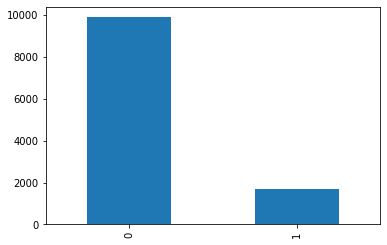

In [109]:
df.Y.value_counts().plot(kind = 'bar')

- Próxima fase será o treinamento do modelo, onde realizarei outras analises com os dados até aqui trabalhados. E caso necessite de outros processamentos será realizado. Optei por utilizar outro notebook para esta fase do projeto.